In [ ]:
TASK 2: DEEP LEARNING PROJECT
image  classification with Tensorflow

In [ ]:
#importing libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#Load and preprocess the data
# Load CIFAR-10
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values (0 to 1)
train_images, test_images = train_images / 255.0, test_images / 255.0

# Class names for visualization
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


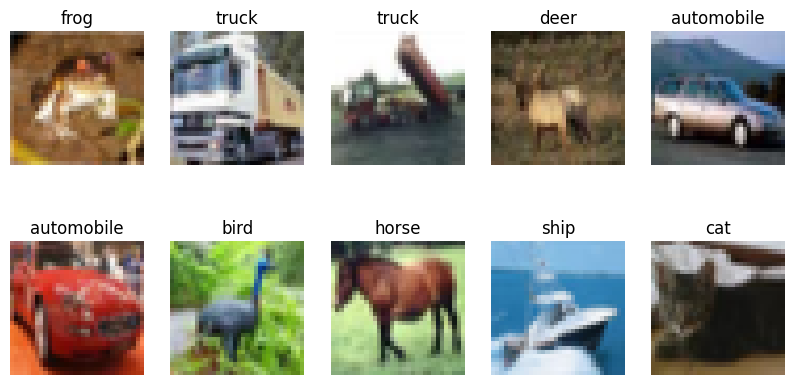

In [ ]:
#visualise the sample images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(train_images[i])
    plt.title(class_names[train_labels[i][0]])
    plt.axis('off')
plt.show()

In [ ]:
#build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
#train the model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 49ms/step - accuracy: 0.3580 - loss: 1.7365 - val_accuracy: 0.5273 - val_loss: 1.2930
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 49ms/step - accuracy: 0.5687 - loss: 1.2084 - val_accuracy: 0.6139 - val_loss: 1.0814
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 46ms/step - accuracy: 0.6402 - loss: 1.0248 - val_accuracy: 0.6453 - val_loss: 1.0060
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 45ms/step - accuracy: 0.6764 - loss: 0.9230 - val_accuracy: 0.6490 - val_loss: 0.9894
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 46ms/step - accuracy: 0.7036 - loss: 0.8515 - val_accuracy: 0.6628 - val_loss: 0.9598
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 71s 46ms/step - accuracy: 0.7285 - loss: 0.7798 - val_accuracy: 0.6894 - val_loss: 0.8919
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 47ms/step - accuracy: 0.7486 - loss: 0.7174 - val_accuracy: 0.6802 - val_loss: 0.9313
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 46ms/step - accuracy: 0.7611 -

In [ ]:
#evaluate the model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 47ms/step - accuracy: 0.8034 - loss: 0.5638 - val_accuracy: 0.7091 - val_loss: 0.8843
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 46ms/step - accuracy: 0.8156 - loss: 0.5285 - val_accuracy: 0.7007 - val_loss: 0.9478
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 72s 46ms/step - accuracy: 0.8264 - loss: 0.4931 - val_accuracy: 0.6991 - val_loss: 0.9717
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 47ms/step - accuracy: 0.8302 - loss: 0.4726 - val_accuracy: 0.6931 - val_loss: 0.9586
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 72s 46ms/step - accuracy: 0.8440 - loss: 0.4410 - val_accuracy: 0.7000 - val_loss: 0.9895
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 72s 46ms/step - accuracy: 0.8496 - loss: 0.4193 - val_accuracy: 0.6825 - val_loss: 1.1086
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 89s 51ms/step - accuracy: 0.8599 - loss: 0.3993 - val_accuracy: 0.7007 - val_loss: 1.0471
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 48ms/step - accuracy: 0.8654 -

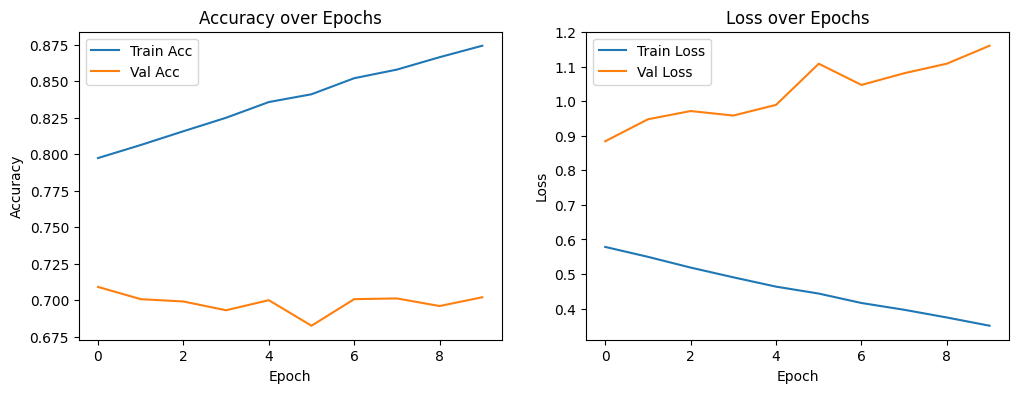

In [ ]:
#visualize accuracy and loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


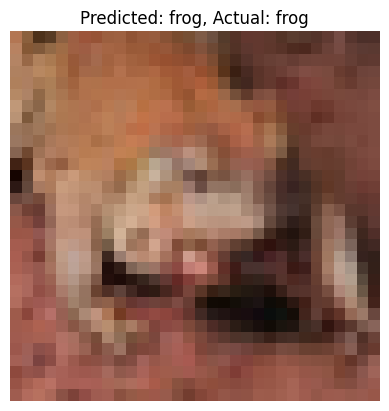

In [ ]:
#make predictions
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

# Show prediction on 1 image
i = 5
plt.imshow(test_images[i])
plt.title(f"Predicted: {class_names[np.argmax(predictions[i])]}, Actual: {class_names[test_labels[i][0]]}")
plt.axis('off')
plt.show()

In [ ]:
#save the model
model.save('model_name.h5')
